In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import seaborn as sns  # for better plot
%matplotlib inline

C:\Users\Franklin Ma\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


## Data Processing

In [3]:
train = pd.read_csv("C:/Baruch MFE/Kaggle/House Prices/train.csv")
test = pd.read_csv("C:/Baruch MFE/Kaggle/House Prices/test.csv")

In [4]:
train.head()
# test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There is no "SalePrice" data, which we want to predict by our model

In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
all_data = pd.concat((train.loc[:,"MSSubClass":"SaleCondition"], test.loc[:,"MSSubClass":"SaleCondition"]))
all_data.shape

(2919, 79)

We combine both train and test data to deal with together

## Data Processing

In [7]:
train["SalePrice"] = np.log1p(train["SalePrice"])
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index  # returns all numeric data type feature name
print numeric_feats

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold'],
      dtype='object')


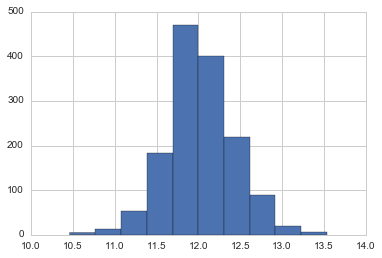

In [8]:
# print skew(train["SalePrice"])
sns.set_style("whitegrid")
train["SalePrice"].hist()
plt.show()

In [9]:
all_data.dtypes  # overview of data type 

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [10]:
# Here we deal with some numerical data
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))  # compute skewness after drop NA data
skewed_feats = skewed_feats[skewed_feats > 0.75]  # only choose skewness larger than 0.75
skewed_feats_idx = skewed_feats.index

all_data[skewed_feats_idx] = np.log1p(all_data[skewed_feats_idx])

In [11]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

In [12]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# set learning data
x_train = all_data[:train.shape[0]]  # split all data we combined before into train and test datasets
x_test = all_data[train.shape[0]:]
y_target = train["SalePrice"]

## Training Model

1. use both Lasso, Ridge, and Lasso regression   
2. use MSE(Mean Square Error) to judge different models using cross validation module in sklearn

In [14]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.cross_validation import cross_val_score

In [15]:
def mse_cv(model):
    mse= cross_val_score(model, x_train, y_target, scoring="mean_squared_error", cv = 5)  # we use 5 folds here
    return(mse)

In [16]:
# ?cross_val_score

In [17]:
model_Ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]  # test different alpha(or lambda) in Ridge regression

In [21]:
cv_Ridge = [mse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
# plt.plot(cv_Ridge)
# plt.show()

In [22]:
cv_Ridge = - cv_Ridge 
cv_Ridge = pd.Series(cv_Ridge, index = alphas)  # change negative squared error into positive ones
plt.plot(cv_Ridge)
plt.show()

TypeError: bad operand type for unary -: 'list'

In [23]:
# We choose alpha = 10 as our Ridge regression parameter
cv_Ridge

[-0.019624607710783438,
 -0.019295267348695341,
 -0.018521730938126264,
 -0.017524852974200634,
 -0.016806363679304652,
 -0.01659115523970963,
 -0.016465160966126907,
 -0.016512540698226583,
 -0.016873398000278105,
 -0.017394287145846545,
 -0.017958416687799524]

In [24]:
np.sqrt(cv_Ridge.min())

AttributeError: 'list' object has no attribute 'min'

In [25]:
model_Ridge = Ridge().fit(x_train, y_target)
coef= pd.Series(model_Ridge.coef_, x_train.columns)

In [26]:
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 288 variables and eliminated the other 0 variables


In [27]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

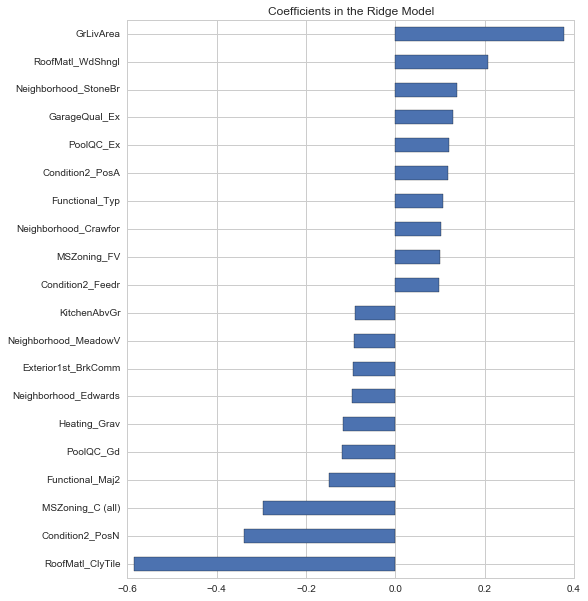

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

# Lasso Regression

In [31]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y_target)

In [32]:
coef = pd.Series(model_lasso.coef_, index = x_train.columns)

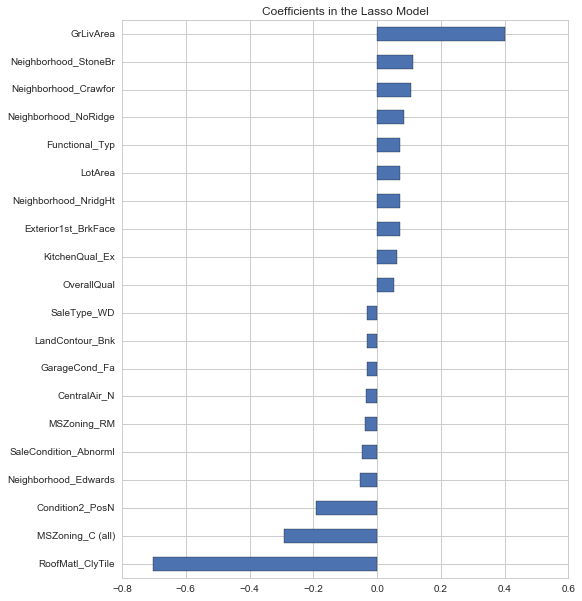

In [33]:
imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

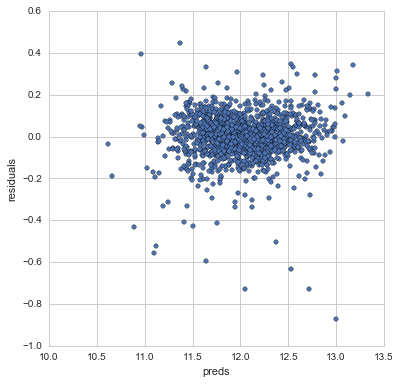

In [39]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(x_train), "true":y_target})
preds["residuals"] = preds["true"] - preds["preds"]  # residual =  true value - predicted value
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.show()

**The residual is good enought to believe that Lasso model is a good fit. **